In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

used_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

used_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


# Question 1

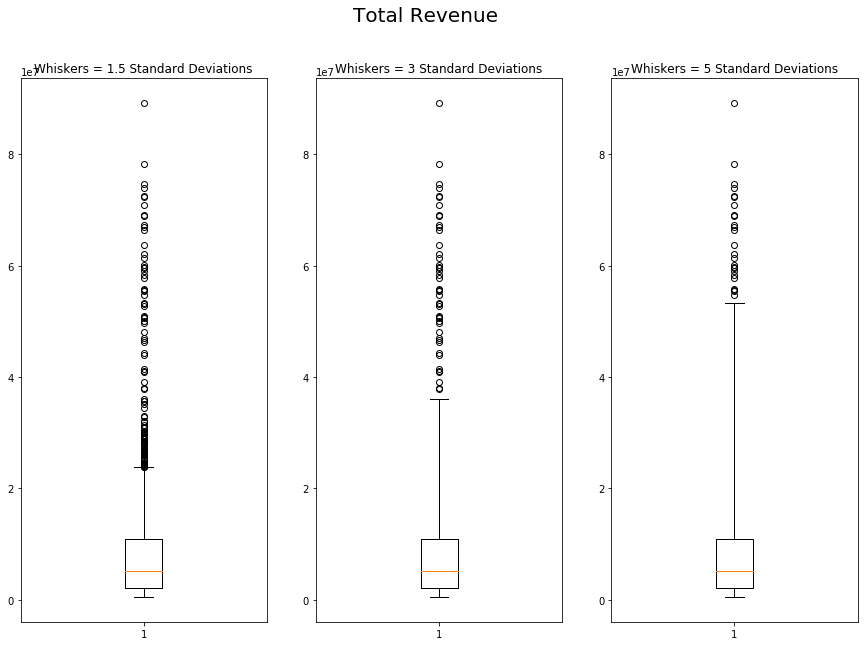

In [29]:
plt.figure(figsize=(15,7))
plt.suptitle('Total Revenue', size=20)

plt.subplot(1,3,1)
plt.title('Whiskers = 1.5 Standard Deviations')
plt.boxplot(used_df['TOTAL_REVENUE'][used_df['TOTAL_REVENUE'].isnull()==False])

plt.subplot(1,3,2)
plt.title('Whiskers = 3 Standard Deviations')
plt.boxplot(used_df['TOTAL_REVENUE'][used_df['TOTAL_REVENUE'].isnull()==False], whis=3)

plt.subplot(1,3,3)
plt.title('Whiskers = 5 Standard Deviations')
plt.boxplot(used_df['TOTAL_REVENUE'][used_df['TOTAL_REVENUE'].isnull()==False], whis=5)


plt.show()

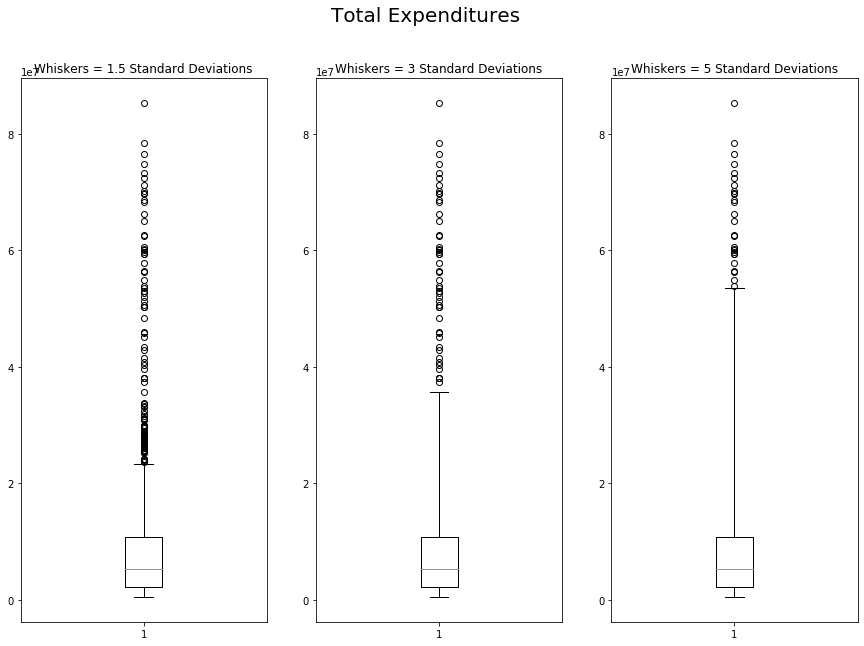

In [30]:
plt.figure(figsize=(15,7))
plt.suptitle('Total Expenditures', size=20)

plt.subplot(1,3,1)
plt.title('Whiskers = 1.5 Standard Deviations')
plt.boxplot(used_df['TOTAL_EXPENDITURE'][used_df['TOTAL_EXPENDITURE'].isnull()==False])

plt.subplot(1,3,2)
plt.title('Whiskers = 3 Standard Deviations')
plt.boxplot(used_df['TOTAL_EXPENDITURE'][used_df['TOTAL_EXPENDITURE'].isnull()==False], whis=3)

plt.subplot(1,3,3)
plt.title('Whiskers = 5 Standard Deviations')
plt.boxplot(used_df['TOTAL_EXPENDITURE'][used_df['TOTAL_EXPENDITURE'].isnull()==False], whis=5)


plt.show()

Yes, even with a threshold of 5 standard deviations, both variables have many outliers.

# Question 2

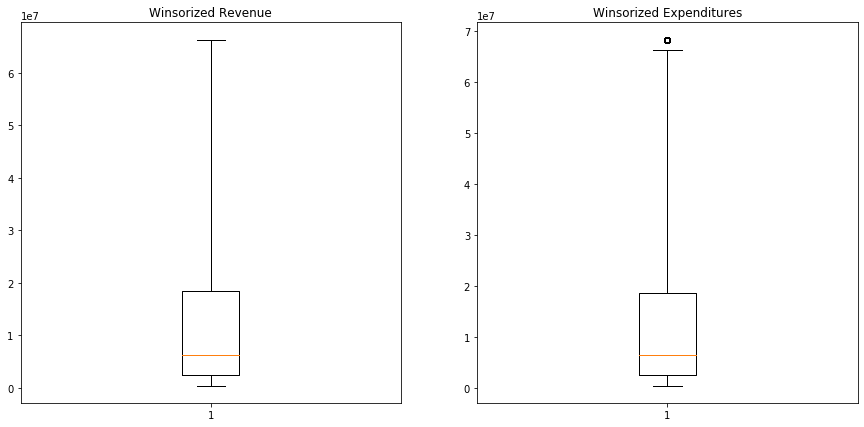

In [91]:
from scipy.stats.mstats import winsorize

#winsorized_revenues = winsorize(used_df['TOTAL_REVENUE'][used_df['TOTAL_REVENUE'].isnull()==False], (0,0.05))
#winsorized_expenditures = winsorize(used_df['TOTAL_EXPENDITURE'][used_df['TOTAL_EXPENDITURE'].isnull()==False], (0,0.05))

winsorized_revenues = winsorize(used_df['TOTAL_REVENUE'], (0,0.15))
winsorized_expenditures = winsorize(used_df['TOTAL_EXPENDITURE'], (0,0.15))


plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.boxplot(winsorized_revenues[pd.isnull(winsorized_revenues)==False], whis=3)
plt.title('Winsorized Revenue')

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditures[pd.isnull(winsorized_expenditures)==False], whis=3)
plt.title('Winsorized Expenditures')
plt.show()

# Question 3

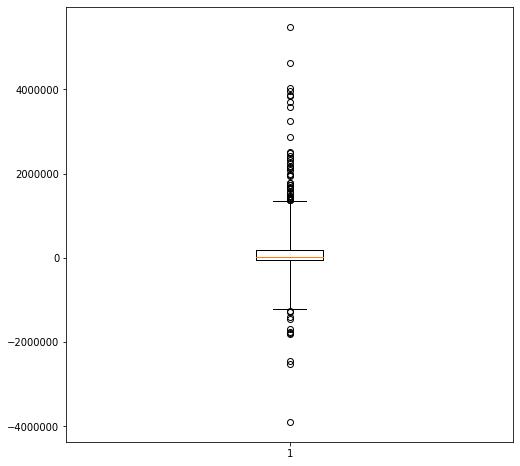

In [73]:
used_df['DEFICIT'] = used_df['TOTAL_EXPENDITURE']-used_df['TOTAL_REVENUE']
plt.figure(figsize=(8,8))
plt.boxplot(used_df['DEFICIT'][used_df['DEFICIT'].isnull()==False], whis=5)
plt.show()

In [80]:
used_df['DEFICIT'] = winsorize(used_df['TOTAL_EXPENDITURE']-used_df['TOTAL_REVENUE'],(.01,.15))

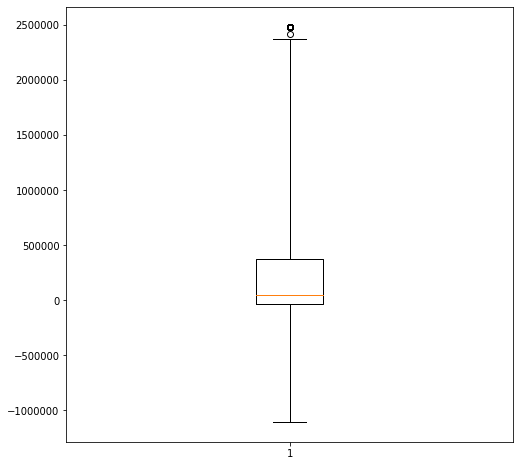

In [81]:
plt.figure(figsize=(8,8))
plt.boxplot(used_df['DEFICIT'][used_df['DEFICIT'].isnull()==False], whis=5)
plt.show()

# Question 4

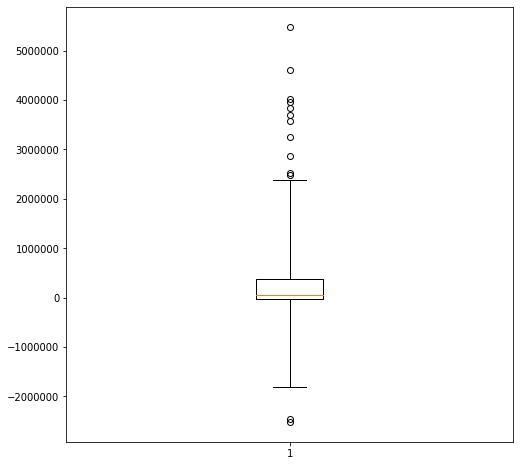

In [92]:
used_df['DEFICIT_2'] = winsorized_expenditures-winsorized_revenues

plt.figure(figsize=(8,8))
plt.boxplot(used_df['DEFICIT_2'][used_df['DEFICIT_2'].isnull()==False], whis=5)
plt.show()

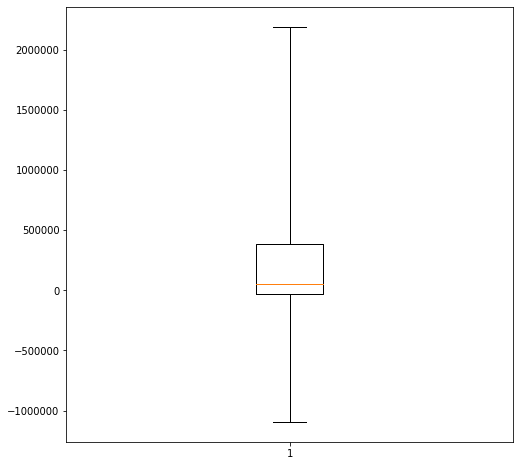

In [93]:
used_df['DEFICIT_2'] = winsorize(used_df['DEFICIT_2'],(.01,.01))

plt.figure(figsize=(8,8))
plt.boxplot(used_df['DEFICIT_2'][used_df['DEFICIT_2'].isnull()==False], whis=5)
plt.show()

# Question 5

In [95]:
print(used_df['DEFICIT'].describe())
print('\n\n')
print(used_df['DEFICIT_2'].describe())

count    1.492000e+03
mean     4.396048e+05
std      9.427201e+05
min     -1.105626e+06
25%     -2.965425e+04
50%      4.849350e+04
75%      3.726632e+05
max      2.485627e+06
Name: DEFICIT, dtype: float64



count    1.492000e+03
mean     3.746206e+05
std      7.901110e+05
min     -1.095352e+06
25%     -2.935500e+04
50%      4.954300e+04
75%      3.813410e+05
max      2.190438e+06
Name: DEFICIT_2, dtype: float64


Our second method (measuring deficit from winsorized revenues and expenditures) produced a field with lower mean and standard deviation.

# Question 6

The second method, where we winsorized 2 measures, then winsorized the difference of those two, seems like it has the potential to introduce an unnecessary amount of measurement error.

In [97]:
used_df['DEFICIT_unmodified'] = used_df['TOTAL_EXPENDITURE']-used_df['TOTAL_REVENUE']
used_df['DEFICIT_unmodified'].describe()

count    1.280000e+03
mean     1.045990e+05
std      5.734045e+05
min     -3.897129e+06
25%     -5.130425e+04
50%      2.148400e+04
75%      1.816858e+05
max      5.487742e+06
Name: DEFICIT_unmodified, dtype: float64

Our modifications drastically change our measures of central tendancy.  I feel nervous about either modification.